### Data Loading and Overview 

In [175]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore,normaltest,shapiro
from sklearn.model_selection import train_test_split

### Importing Dataset

In [176]:
df=pd.read_csv(r"C:\Users\Akash\Desktop\IT Vedant\Diving Into world of data (DWD)\Datasets\Road Accident Data.csv")

### Data Preview

In [177]:
df.head()

,Accident_Index,Accident Date,Month,Day_of_Week,Year,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,...,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200901BS70001,01-01-2021,Jan,Thursday,2021,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,...,1,2,Metropolitan Police,Dry,One way street,30,15:11,Urban,Fine no high winds,Car
1,200901BS70002,05-01-2021,Jan,Monday,2021,Give way or uncontrolled,Crossroads,Serious,51.514399,Daylight,...,11,2,Metropolitan Police,Wet or damp,Single carriageway,30,10:59,Urban,Fine no high winds,Taxi/Private hire car
2,200901BS70003,04-01-2021,Jan,Sunday,2021,Give way or uncontrolled,T or staggered junction,Slight,51.486668,Daylight,...,1,2,Metropolitan Police,Dry,Single carriageway,30,14:19,Urban,Fine no high winds,Taxi/Private hire car
3,200901BS70004,05-01-2021,Jan,Monday,2021,Auto traffic signal,T or staggered junction,Serious,51.507804,Daylight,...,1,2,Metropolitan Police,Frost or ice,Single carriageway,30,08:10,Urban,Other,Motorcycle over 500cc
4,200901BS70005,06-01-2021,Jan,Tuesday,2021,Auto traffic signal,Crossroads,Serious,51.482076,Darkness - lights lit,...,1,2,Metropolitan Police,Dry,Single carriageway,30,17:25,Urban,Fine no high winds,Car


### Display the number of Rows and Columns 

In [178]:
df.size

7083379

In [179]:
df.shape

(307973, 23)

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307973 entries, 0 to 307972
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Accident_Index              307973 non-null  object 
 1   Accident Date               307973 non-null  object 
 2   Month                       307973 non-null  object 
 3   Day_of_Week                 307973 non-null  object 
 4   Year                        307973 non-null  int64  
 5   Junction_Control            307973 non-null  object 
 6   Junction_Detail             307973 non-null  object 
 7   Accident_Severity           307973 non-null  object 
 8   Latitude                    307973 non-null  float64
 9   Light_Conditions            307973 non-null  object 
 10  Local_Authority_(District)  307973 non-null  object 
 11  Carriageway_Hazards         5424 non-null    object 
 12  Longitude                   307973 non-null  float64
 13  Number_of_Casu

In [181]:
df.describe()

,Year,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles,Speed_limit
count,307973.000000,307973.000000,307973.000000,307973.000000,307973.000000,307973.000000
mean,2021.468934,52.487005,-1.368884,1.356882,1.829063,38.866037
std,0.499035,1.339011,1.356092,0.815857,0.710477,14.032933
min,2021.000000,49.914488,-7.516225,1.000000,1.000000,10.000000
25%,2021.000000,51.485248,-2.247937,1.000000,1.000000,30.000000
50%,2021.000000,52.225943,-1.349258,1.000000,2.000000,30.000000
75%,2022.000000,53.415517,-0.206810,1.000000,2.000000,50.000000
max,2022.000000,60.598055,1.759398,48.000000,32.000000,70.000000


### Data Cleaning 

In [182]:
df.isna().sum()

Accident_Index                     0
Accident Date                      0
Month                              0
Day_of_Week                        0
Year                               0
Junction_Control                   0
Junction_Detail                    0
Accident_Severity                  0
Latitude                           0
Light_Conditions                   0
Local_Authority_(District)         0
Carriageway_Hazards           302549
Longitude                          0
Number_of_Casualties               0
Number_of_Vehicles                 0
Police_Force                       0
Road_Surface_Conditions          317
Road_Type                       1534
Speed_limit                        0
Time                              17
Urban_or_Rural_Area                0
Weather_Conditions              6057
Vehicle_Type                       0
dtype: int64

In [183]:
df.dropna(inplace=True)

In [184]:
df.reset_index(inplace=True)
df

,index,Accident_Index,Accident Date,Month,Day_of_Week,Year,Junction_Control,Junction_Detail,Accident_Severity,Latitude,...,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,195,200901BS70234,13-05-2021,May,Wednesday,2021,Give way or uncontrolled,T or staggered junction,Slight,51.495373,...,2,1,Metropolitan Police,Dry,Single carriageway,30,19:00,Urban,Fine no high winds,Car
1,414,200901BS70488,04-09-2021,Sep,Friday,2021,Auto traffic signal,Crossroads,Slight,51.497136,...,1,1,Metropolitan Police,Dry,Single carriageway,30,15:55,Urban,Fine no high winds,Car
2,476,200901BS70562,06-10-2021,Oct,Tuesday,2021,Auto traffic signal,T or staggered junction,Slight,51.495660,...,1,2,Metropolitan Police,Dry,Single carriageway,30,17:36,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
3,854,200901CP00246,24-09-2021,Sep,Thursday,2021,Data missing or out of range,Not at junction or within 20 metres,Serious,51.511819,...,1,1,City of London,Dry,Single carriageway,30,08:35,Urban,Fine no high winds,Car
4,889,200901CP00294,05-10-2021,Oct,Monday,2021,Give way or uncontrolled,T or staggered junction,Slight,51.513312,...,1,1,City of London,Wet or damp,Single carriageway,30,16:10,Urban,Fine no high winds,Car
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5300,307902,201091NK02693,26-05-2022,May,Wednesday,2022,Data missing or out of range,Not at junction or within 20 metres,Slight,58.901246,...,1,1,Northern,Dry,Single carriageway,60,07:25,Rural,Fine no high winds,Car
5301,307911,201091NK04184,23-08-2022,Aug,Monday,2022,Data missing or out of range,Not at junction or within 20 metres,Slight,58.864247,...,1,1,Northern,Wet or damp,Single carriageway,60,20:15,Rural,Raining no high winds,Car
5302,307918,201091NK05765,14-11-2022,Nov,Sunday,2022,Data missing or out of range,Not at junction or within 20 metres,Slight,59.249732,...,1,1,Northern,Dry,Single carriageway,60,01:00,Rural,Fine + high winds,Car
5303,307960,201091NM00770,21-01-2022,Jan,Thursday,2022,Data missing or out of range,Not at junction or within 20 metres,Slight,56.879446,...,2,4,Northern,Snow,Single carriageway,60,18:20,Rural,Snowing + high winds,Car


In [185]:
df.isna().sum()

index                         0
Accident_Index                0
Accident Date                 0
Month                         0
Day_of_Week                   0
Year                          0
Junction_Control              0
Junction_Detail               0
Accident_Severity             0
Latitude                      0
Light_Conditions              0
Local_Authority_(District)    0
Carriageway_Hazards           0
Longitude                     0
Number_of_Casualties          0
Number_of_Vehicles            0
Police_Force                  0
Road_Surface_Conditions       0
Road_Type                     0
Speed_limit                   0
Time                          0
Urban_or_Rural_Area           0
Weather_Conditions            0
Vehicle_Type                  0
dtype: int64

In [189]:
print("Size of Dataset:",df.size)
print("Row,Cloumns:",rows,columns=df[shape])

Size of Dataset: 127320


NameError: name 'rows' is not defined

### Numerical Columns

In [155]:
num_col=["Number_of_Casualties","Number_of_Vehicles","Speed_limit"]
stat={}
for col in num_col:
    stat[col]={
        "Mean":df[col].mean(),
        "Median":df[col].median(),
        "Mode":df[col].mode()[0],
        "Variance":df[col].var(),
        "Standard Daviation":df[col].std(),
        "Skewness":df[col].skew(),
        "Range":df[col].max()-df[col].min(),
        "IQR":df[col].quantile(0.75)-df[col].quantile(0.25)
    }

stat1=pd.DataFrame(stat)
stat1

,Number_of_Casualties,Number_of_Vehicles,Speed_limit
Mean,1.395287,1.707446,46.580584
Median,1.000000,1.000000,40.000000
Mode,1.000000,1.000000,30.000000
Variance,0.677617,0.912511,265.492421
Standard Daviation,0.823175,0.955254,16.293938
Skewness,2.928628,2.647689,0.140629
Range,8.000000,13.000000,50.000000
IQR,1.000000,1.000000,30.000000


In [156]:
df.columns

Index(['index', 'Accident_Index', 'Accident Date', 'Month', 'Day_of_Week',
       'Year', 'Junction_Control', 'Junction_Detail', 'Accident_Severity',
       'Latitude', 'Light_Conditions', 'Local_Authority_(District)',
       'Carriageway_Hazards', 'Longitude', 'Number_of_Casualties',
       'Number_of_Vehicles', 'Police_Force', 'Road_Surface_Conditions',
       'Road_Type', 'Speed_limit', 'Time', 'Urban_or_Rural_Area',
       'Weather_Conditions', 'Vehicle_Type'],
      dtype='object')

### Outliers checking and handling

Handling outlier for Number_of_Casualties:
IQR:1.0
LowerTail:-0.5
Uppertail:3.5
Boxplot After Handling of outliers:



C:\Users\Akash\AppData\Local\Temp\ipykernel_26992\3625026624.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df[col] < Lowertail), col] = Lowertail


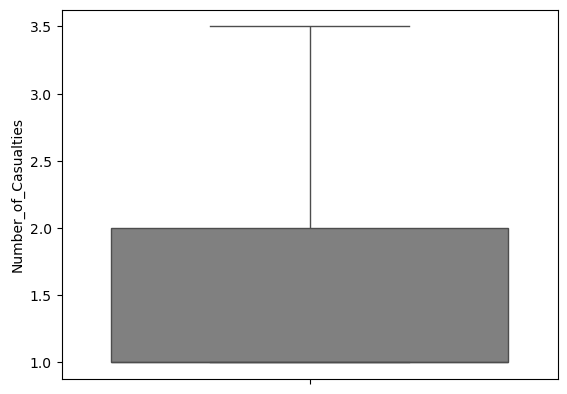

****************************************************************************************************
Handling outlier for Number_of_Vehicles:
IQR:1.0
LowerTail:-0.5
Uppertail:3.5
Boxplot After Handling of outliers:



C:\Users\Akash\AppData\Local\Temp\ipykernel_26992\3625026624.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df[col] < Lowertail), col] = Lowertail


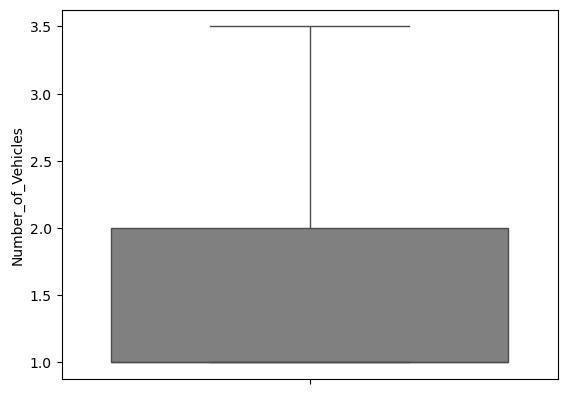

****************************************************************************************************
Handling outlier for Speed_limit:
IQR:30.0
LowerTail:-15.0
Uppertail:105.0
Boxplot After Handling of outliers:



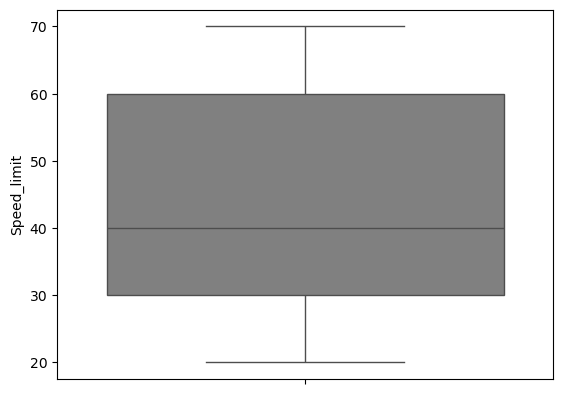

****************************************************************************************************


In [157]:
for col in num_col:
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr=q3-q1
    Lowertail=q1-1.5*iqr
    Uppertail=q3+1.5*iqr
    print(f"Handling outlier for {col}:")
    print(f"IQR:{iqr}")
    print(f"LowerTail:{Lowertail}")
    print(f"Uppertail:{Uppertail}")

    # Outlier checking
    outlier=df[(df[col]<Lowertail) | (df[col]>Uppertail)]
    outlier

    # Handling of outliers
    df.loc[(df[col] < Lowertail), col] = Lowertail
    df.loc[(df[col] > Uppertail), col] = Uppertail
    print("Boxplot After Handling of outliers:\n")
    sns.boxplot(df[col], color = "Grey")
    plt.show()
    print(f"*"*100)

## Zscore of Numerical columns

In [158]:
for col in num_col:
    print(f"ZScore of {col}:")
    Zscore=zscore(df[col])
    print(Zscore)
    print("*"*100)

ZScore of Number_of_Casualties:
0       0.947832
1      -0.532371
2      -0.532371
3      -0.532371
4      -0.532371
          ...   
5300   -0.532371
5301   -0.532371
5302   -0.532371
5303    0.947832
5304   -0.532371
Name: Number_of_Casualties, Length: 5305, dtype: float64
****************************************************************************************************
ZScore of Number_of_Vehicles:
0      -0.855805
1      -0.855805
2       0.445254
3      -0.855805
4      -0.855805
          ...   
5300   -0.855805
5301   -0.855805
5302   -0.855805
5303    2.396844
5304   -0.855805
Name: Number_of_Vehicles, Length: 5305, dtype: float64
****************************************************************************************************
ZScore of Speed_limit:
0      -1.017688
1      -1.017688
2      -1.017688
3      -1.017688
4      -1.017688
          ...   
5300    0.823661
5301    0.823661
5302    0.823661
5303    0.823661
5304    0.823661
Name: Speed_limit, Length: 5305, dtype: 

### Categorical Columns

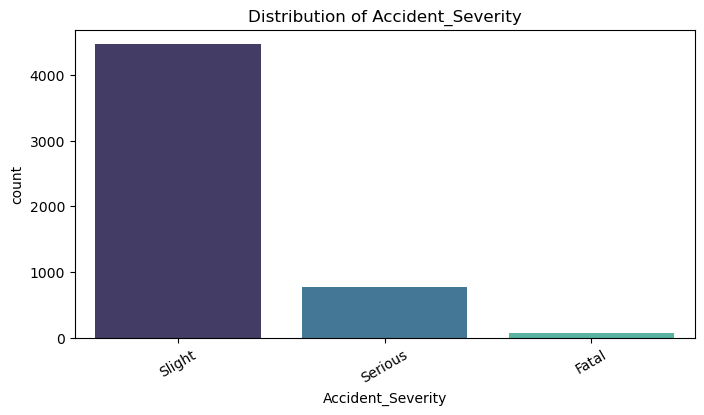

************************************************************************************************************************


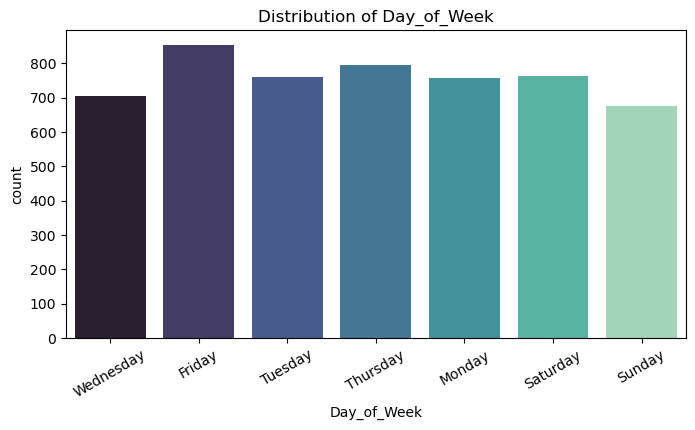

************************************************************************************************************************


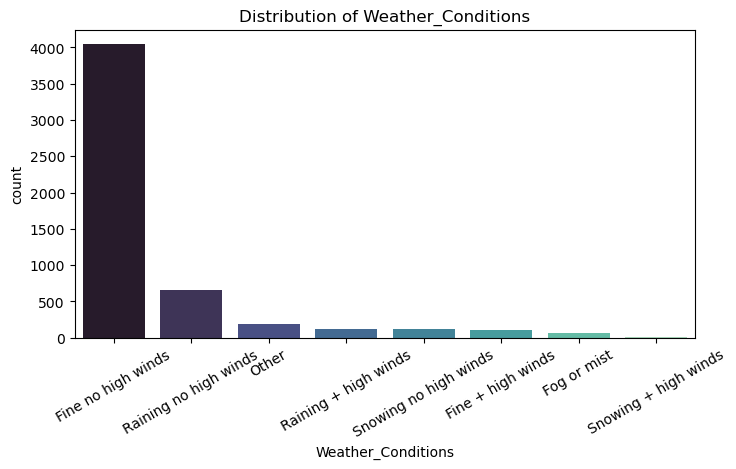

************************************************************************************************************************


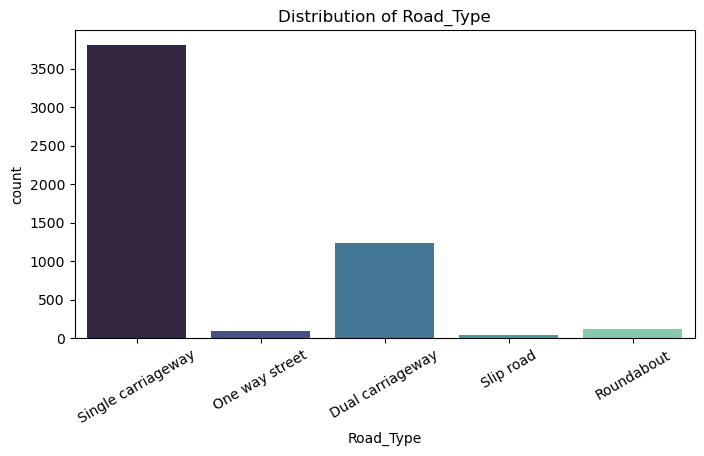

************************************************************************************************************************


In [192]:
cat_col = ['Accident_Severity', 'Day_of_Week', 'Weather_Conditions', 'Road_Type',]
for col in cat_col:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=df,hue=col, palette="mako")
    plt.xticks(rotation=30)
    plt.title(f'Distribution of {col}')
    plt.show()
    print("*"*120)

## Correlation Matrix for Numerical Data

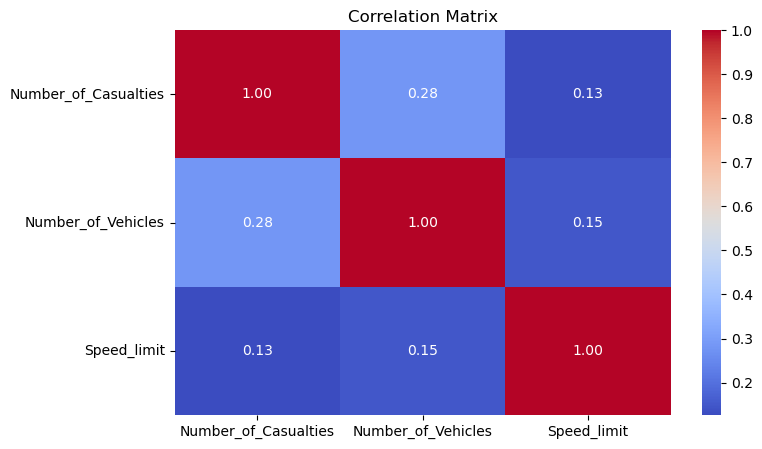

In [160]:
plt.figure(figsize=(8, 5))
sns.heatmap(df[num_col].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

### Pairplot for Relationship Analysis

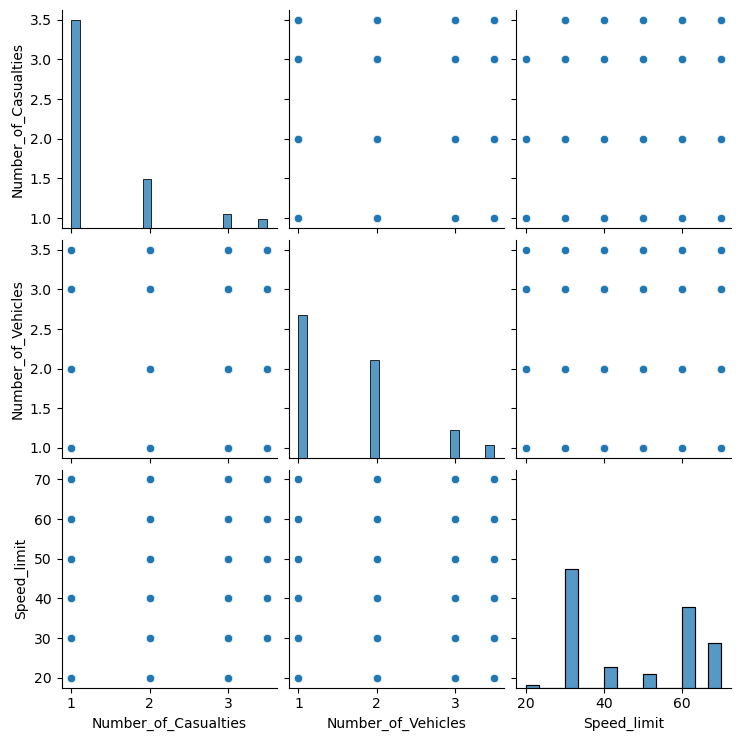

In [161]:
sns.pairplot(df[num_col])
plt.show()

## Q1: Which weather condition has the highest number of severe accidents?

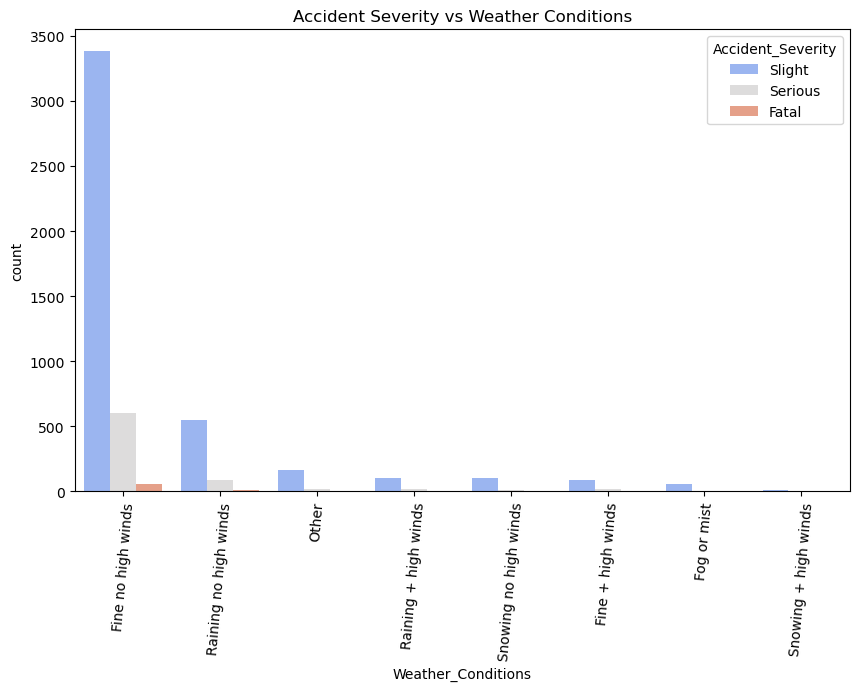

In [162]:
# Accident Severity vs Weather Conditions
plt.figure(figsize=(10, 6))
sns.countplot(x='Weather_Conditions', hue='Accident_Severity', data=df, palette='coolwarm')
plt.xticks(rotation=85)
plt.title('Accident Severity vs Weather Conditions')
plt.show()

## Q2: Which Road Type has the highest number of severe accidents?

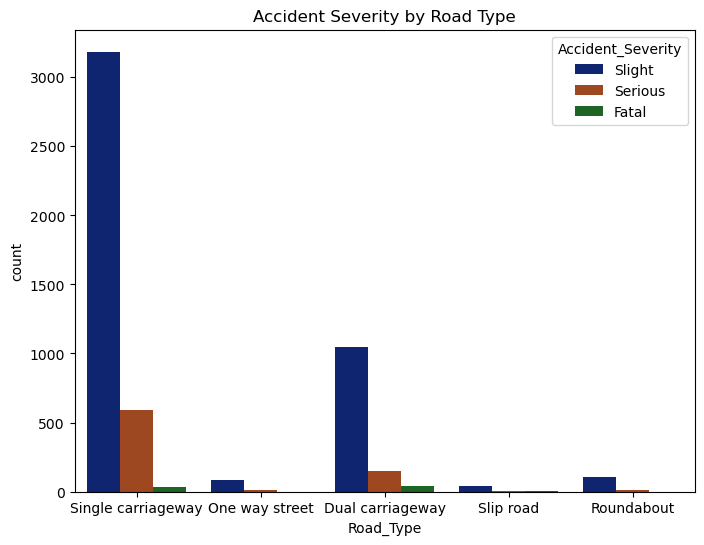

In [163]:
# Accident Severity by Road Type
plt.figure(figsize=(8,6))
sns.countplot(x="Road_Type",data=df,hue="Accident_Severity",palette='dark')
plt.title("Accident Severity by Road Type")
plt.show()

## Q3: Does a higher speed limit result in more casualties?

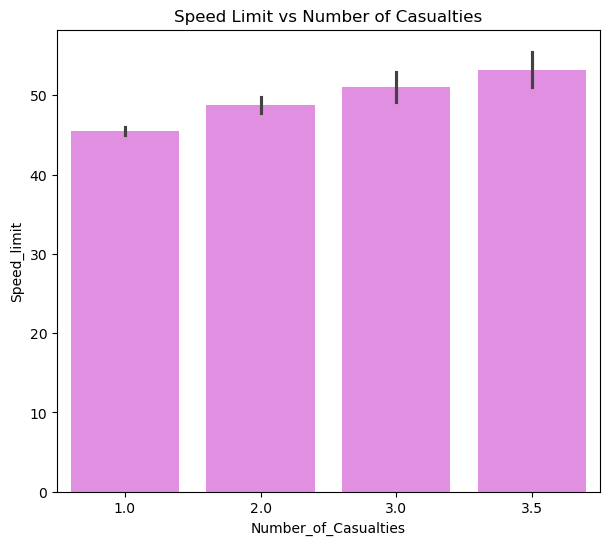

In [164]:
plt.figure(figsize=(7, 6))
sns.barplot(x='Number_of_Casualties', y='Speed_limit', data=df,color="Violet")
plt.title('Speed Limit vs Number of Casualties')
plt.show()

## Q4: Which day of the week sees the most accidents?

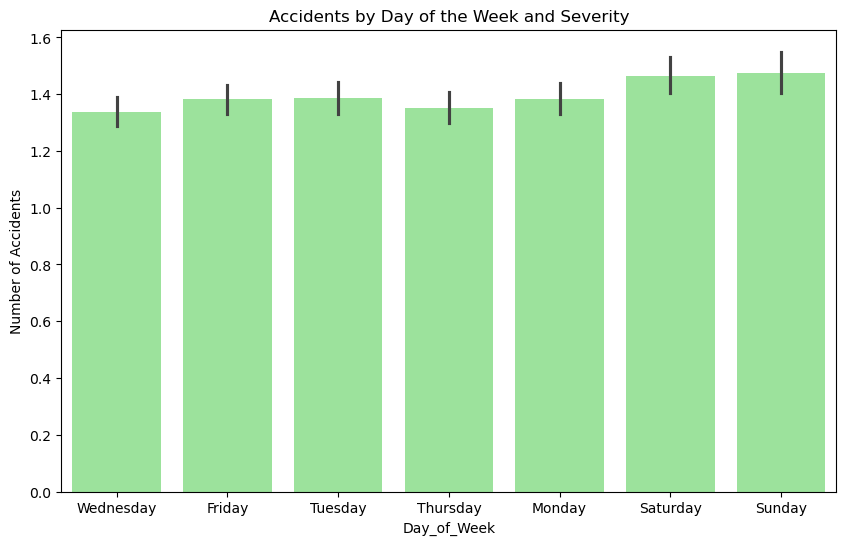

In [190]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Day_of_Week', y='Number_of_Casualties', data=df,color="lightGreen")
plt.title('Accidents by Day of the Week and Severity')
plt.ylabel('Number of Accidents')
plt.show()

## Q5: What is the trend of accidents over the months?

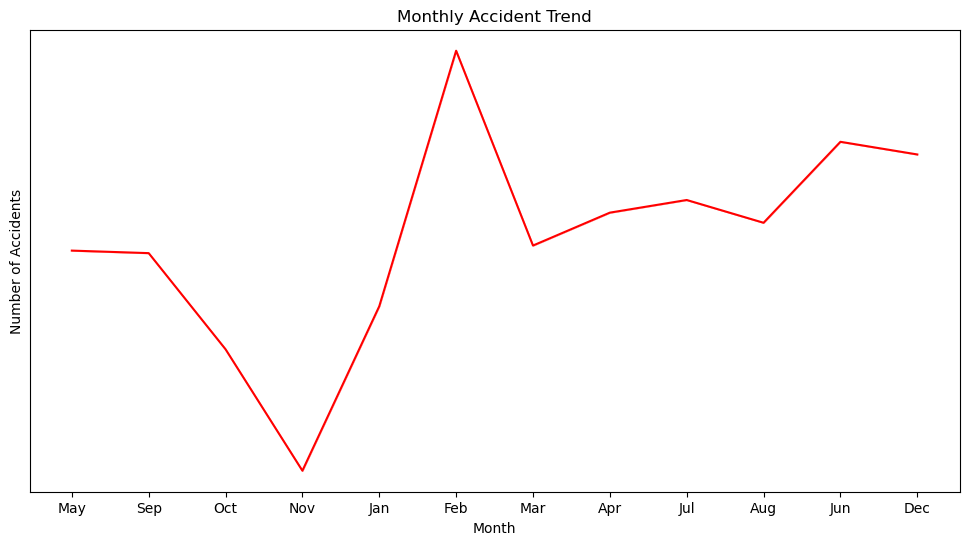

In [166]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Accident_Severity', data=df, estimator=lambda x: len(x),color="Red")
plt.title('Monthly Accident Trend')
plt.ylabel('Number of Accidents')
plt.show()

## Q6.What is the Percentage rate of accidents by Light_Conditions

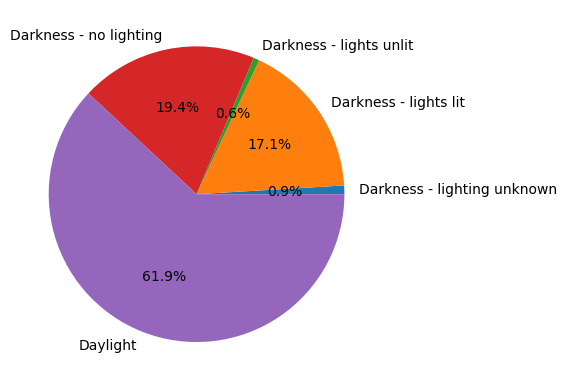

In [167]:
a=df.groupby("Light_Conditions").agg({"Light_Conditions":"count"})
plt.pie(a["Light_Conditions"],data=df,autopct="%1.1f%%",labels=a.index)
plt.show()

## Q7. What is the total Casualties over speed and Areas

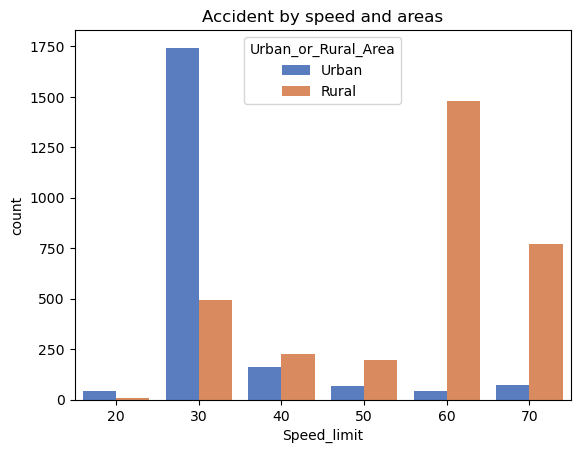

In [168]:
sns.countplot(x="Speed_limit",data=df,hue="Urban_or_Rural_Area",palette="muted")
plt.title("Accident by speed and areas")
plt.show()

## Q8: Which vehicle type is involved in the most severe accidents?

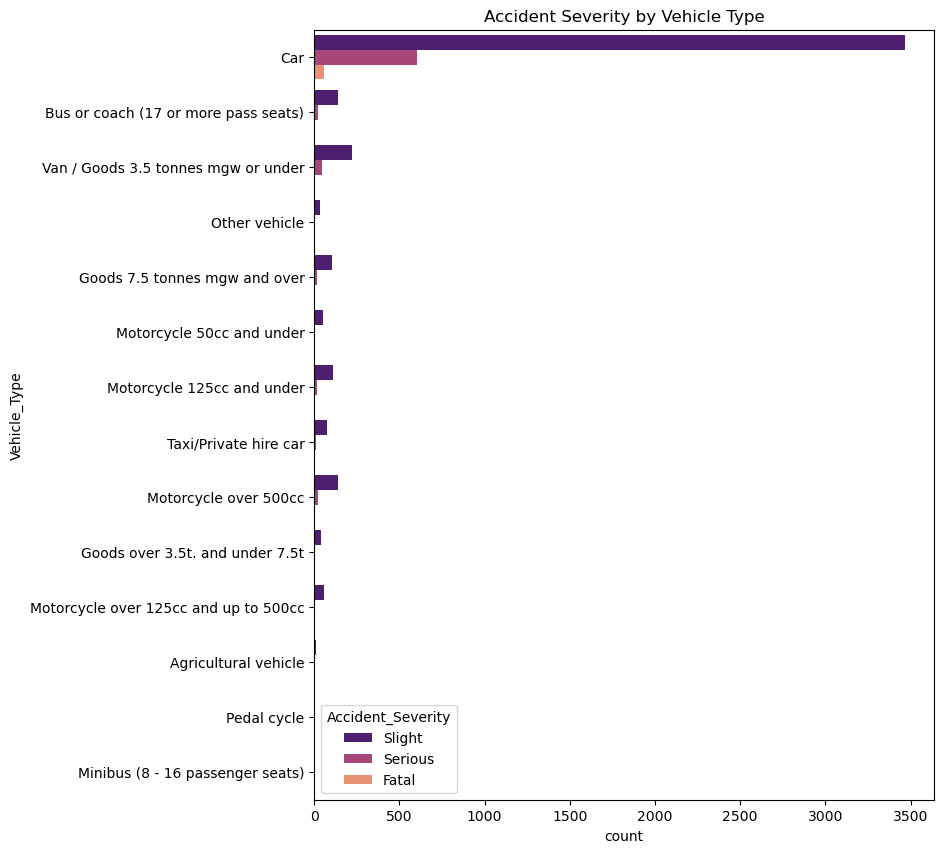

In [169]:
plt.figure(figsize=(8, 10))
sns.countplot(y='Vehicle_Type', hue='Accident_Severity', data=df, palette='magma')
plt.title('Accident Severity by Vehicle Type')
plt.show()

## Q9: Pie chart showing proportion of accidents by severity

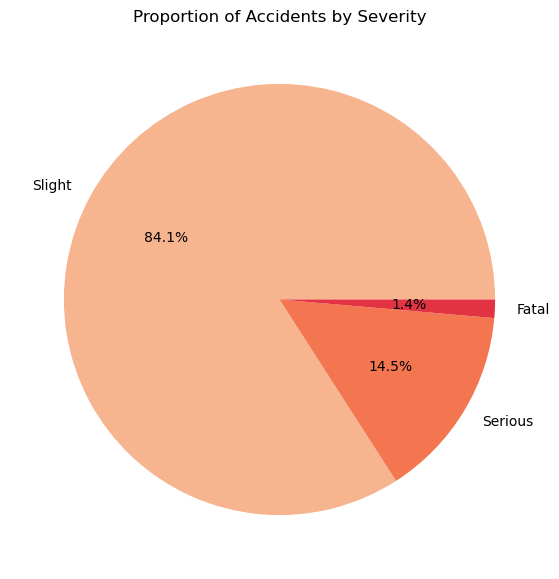

In [170]:
plt.figure(figsize=(7, 7))
df['Accident_Severity'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('rocket_r'))
plt.title('Proportion of Accidents by Severity')
plt.ylabel('')
plt.show()

## Q10: Stacked bar chart for accidents based on road type and light conditions

<Figure size 1200x600 with 0 Axes>

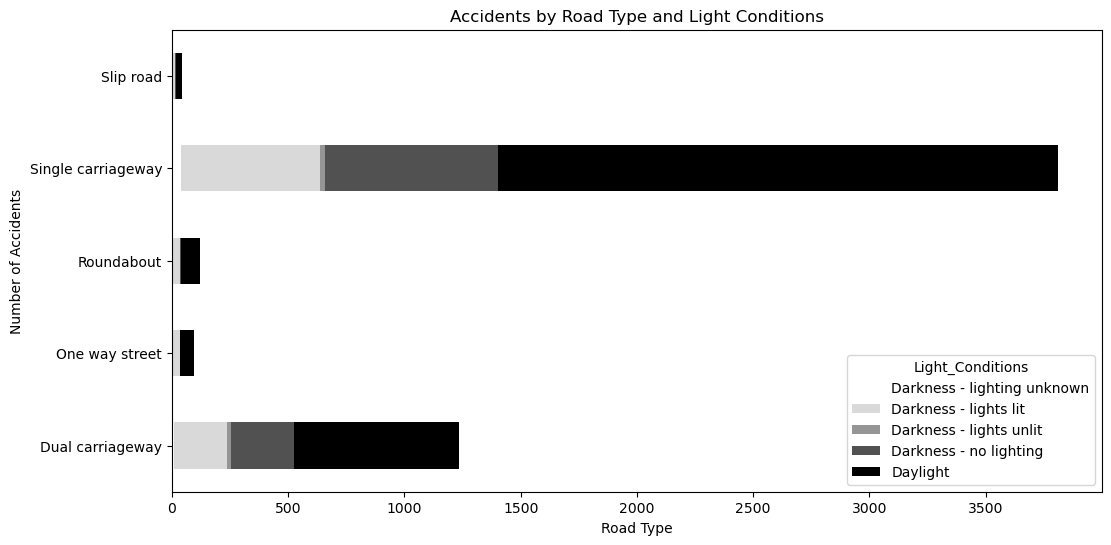

In [171]:
plt.figure(figsize=(12, 6))
road_light_data = pd.crosstab(df['Road_Type'], df['Light_Conditions'])
road_light_data.plot(kind='barh', stacked=True, colormap='Grays', figsize=(12, 6))
plt.title('Accidents by Road Type and Light Conditions')
plt.xlabel('Road Type')
plt.ylabel('Number of Accidents')
plt.show()

## Kde Plot for Numerical Columns

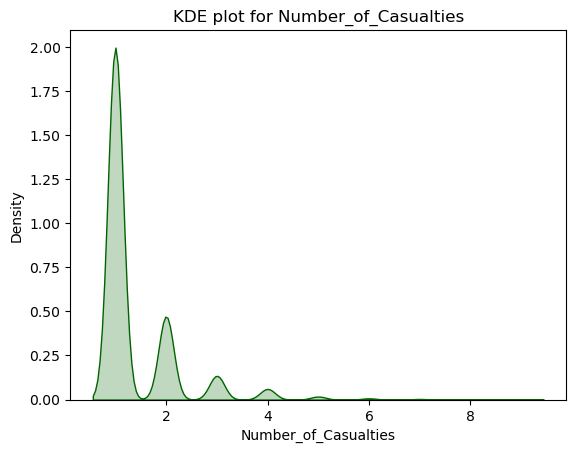

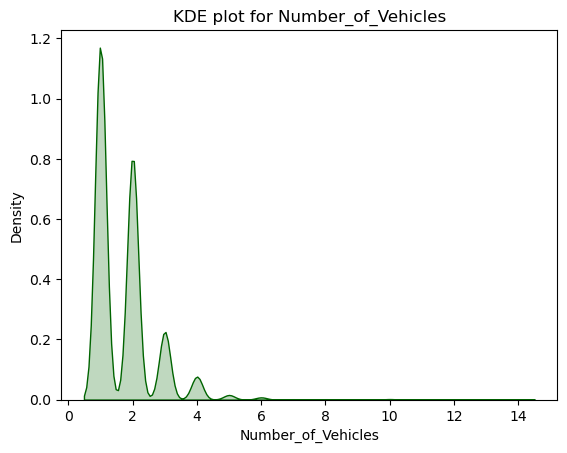

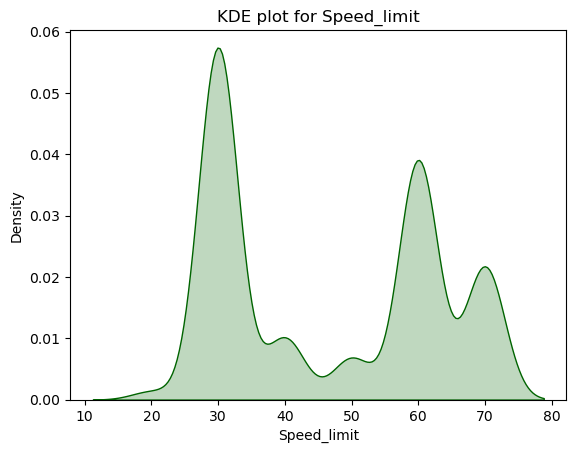

In [197]:
for col in num_col:
    sns.kdeplot(df[col],fill=True,color="DarkGreen")
    plt.title(f"KDE plot for {col}")
    plt.show()

### Check for Normality of Number_of_Vehicles/Speed_limit column by hypothesis testing

In [200]:
stats,pval=shapiro(df["Number_of_Vehicles"])
if pval>0.05:
    print("Null Hyphothesis is True")
    print("Data is normally distributed")
else:
    print("Alternative Hyphothesis is True")
    print("Data is not normally distributed")

Alternative Hyphothesis is True
Data is not normally distributed


In [199]:
stats,pval=normaltest(df["Number_of_Vehicles"])
if pval>0.05:
    print("Null Hyphothesis is True")
    print("Data is normally distributed")
else:
    print("Alternative Hyphothesis is True")
    print("Data is not normally distributed")

Alternative Hyphothesis is True
Data is not normally distributed
